In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("cars.csv")

### Top 5 records

In [6]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [14]:
df.shape

(36, 5)

In [15]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [7]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [10]:
df.duplicated().sum()

0

<Axes: >

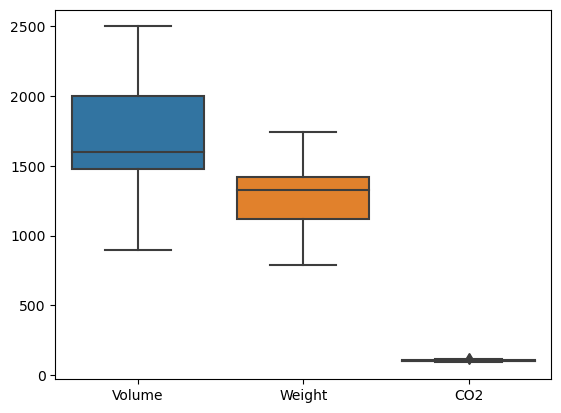

In [13]:
sns.boxplot(df)

### Check datatype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


### Check number of missing values

In [19]:
df.nunique()

Car       17
Model     35
Volume    12
Weight    31
CO2       17
dtype: int64

### Define Numerical and categorical column


In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [23]:
numeric_features

['Volume', 'Weight', 'CO2']

In [24]:
categorical_features

['Car', 'Model']

### Analysing Data(Visualization)

#### 1.Scatter Plot

<Axes: xlabel='Weight', ylabel='CO2'>

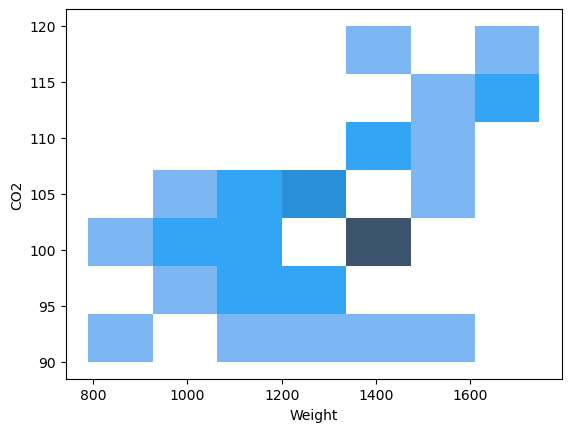

In [26]:
sns.histplot(data=df,x='Weight',y="CO2")

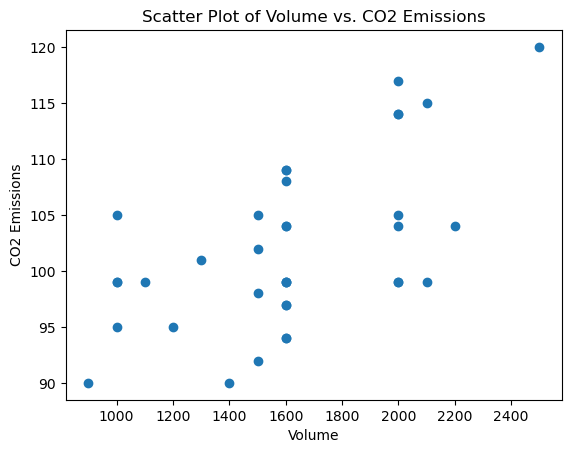

In [29]:
plt.scatter(df['Volume'], df['CO2'])
plt.xlabel('Volume')
plt.ylabel('CO2 Emissions')
plt.title('Scatter Plot of Volume vs. CO2 Emissions')
plt.show()


#### Bar Chart

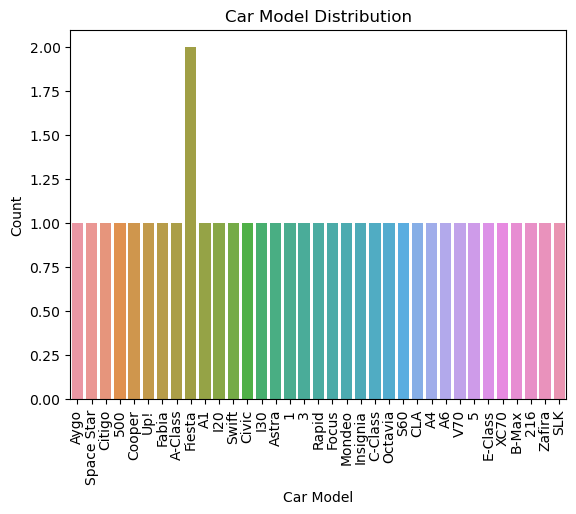

In [32]:
sns.countplot(data=df, x='Model')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title('Car Model Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### correlation Matrix

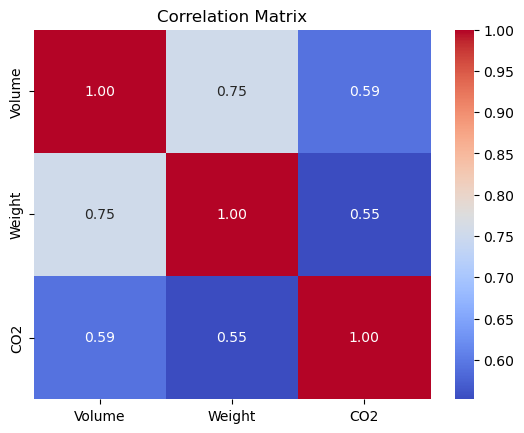

In [33]:
correlation_matrix = df[['Volume', 'Weight', 'CO2']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='CO2', ylabel='Density'>

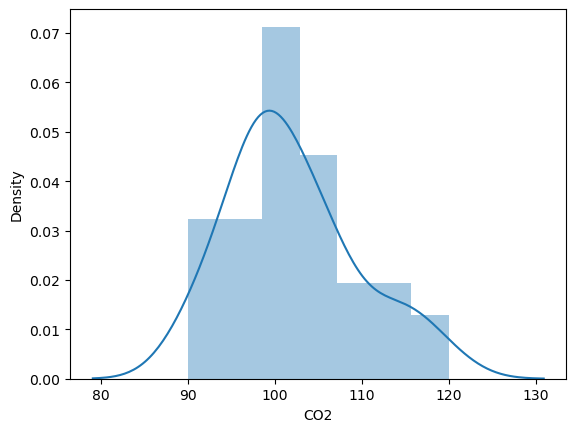

In [36]:
sns.distplot(df["CO2"])

### Divide data into independent and dependent variable

In [41]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [42]:
X = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [43]:
X


,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140
5,1000,929
6,1400,1109
7,1500,1365
8,1500,1112
9,1600,1150


In [44]:
y

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64

### Divide data into Train test

In [90]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
X_train.shape

(25, 2)

In [92]:
X_test.shape

(11, 2)

### Linear regression

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression()

In [95]:
model.score(X_train,y_train)

0.4644469429693493

In [96]:
y_pred = model.predict(X_test)

In [99]:
 from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error

In [100]:
r2_score(y_test,y_pred)

-0.02015472199963586

44.195463245637114

In [102]:
mean_squared_error(y_test,y_pred)

44.195463245637114

### Regularisation (Ridge and Lasso)

In [116]:
 from sklearn.linear_model import Ridge,Lasso

In [110]:
model2 = Ridge(alpha=0.1)

In [111]:
model2.fit(X_train,y_train)

Ridge(alpha=0.1)

In [112]:
model2.score(X_train,y_train)

0.4644469429693485

In [113]:
rid_pred = model2.predict(X_test)

In [114]:
rid_pred

array([101.87075341,  92.94067468,  99.55324296,  98.34608982,
       102.35690329, 107.59751769, 109.81202767,  91.50896823,
        92.94067468, 102.7586051 , 107.21021133])

In [115]:
r2_score(y_test,rid_pred)

-0.02015469528225111

In [117]:
model3 = Lasso()

In [118]:
model3.fit(X_train,y_train)

Lasso()

In [119]:
model3.score(X_train,y_train)

0.4644465764831077